In [ ]:
!pip install openai matplotlib python-dotenv

Initializing AI-Powered Compliance Management System...

Generating sample compliance events...

Starting compliance event simulation...

--- Processing Event on 2024-06-15 21:08:48.447735 ---
Financial Compliance Module sending event: user_activity
Event passed compliance check: user_activity
Data Privacy Module received event: user_activity
Security Module received event: user_activity

--- Processing Event on 2024-06-15 21:08:48.447735 ---
Financial Compliance Module sending event: user_activity
Event passed compliance check: user_activity
Data Privacy Module received event: user_activity
Security Module received event: user_activity

--- Processing Event on 2024-06-17 21:08:48.447735 ---
Security Module sending event: system_update
Event passed compliance check: system_update
Data Privacy Module received event: system_update
Financial Compliance Module received event: system_update

--- Processing Event on 2024-06-19 21:08:48.447735 ---
Financial Compliance Module sending event: fi

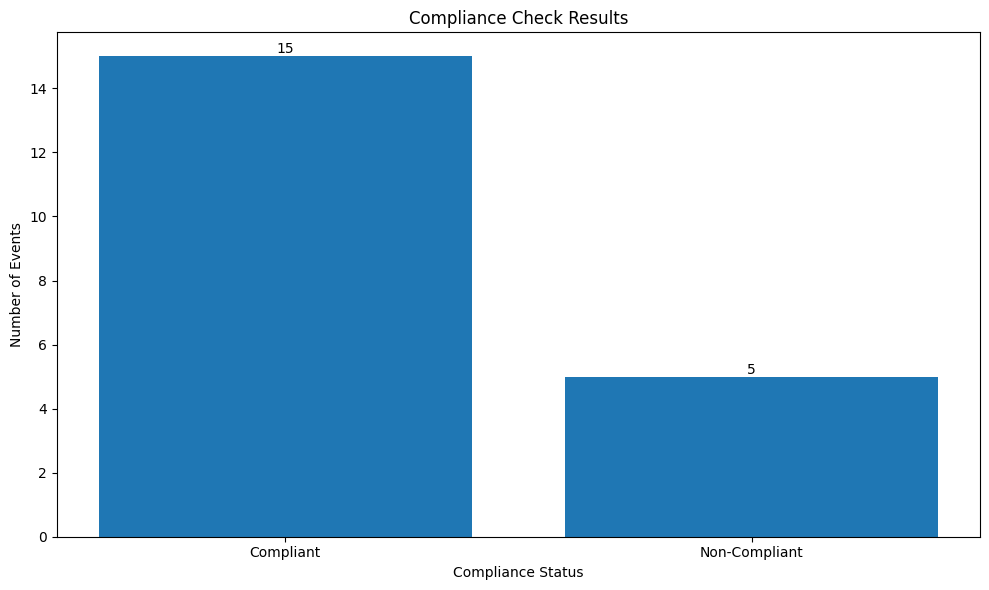


Visualizing module activity distribution...


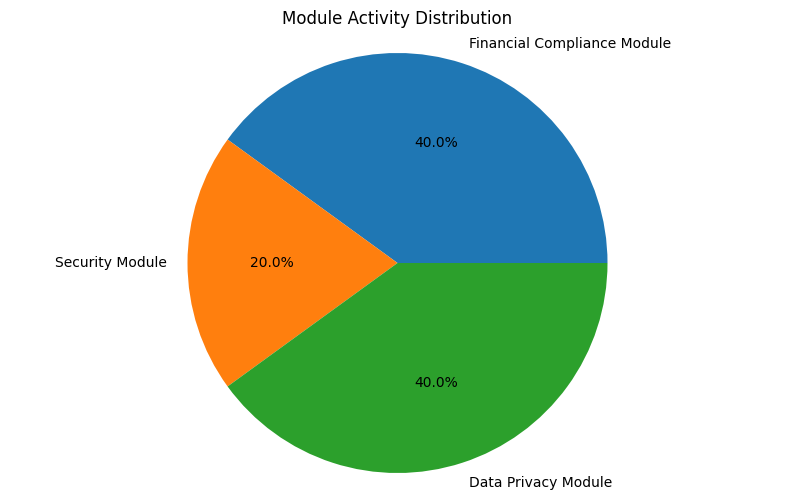

In [6]:
# AI-Powered Mediator Pattern: Policy Application and Compliance Checking

import abc
from typing import List, Tuple
from openai import OpenAI
import random
from datetime import datetime, timedelta
from dotenv import load_dotenv

load_dotenv()

Client = OpenAI()

# 1. Define Mediator Interface
class ComplianceMediator(abc.ABC):
    @abc.abstractmethod
    def process_event(self, sender: object, event: dict) -> None:
        pass

# 2. Implement Concrete Mediator with AI-powered policy application
class AIComplianceMediator(ComplianceMediator):
    def __init__(self):
        self.modules = []
        self.logs = []

    def add_module(self, module):
        self.modules.append(module)
        module.mediator = self

    def process_event(self, sender: object, event: dict) -> None:
        compliance_result = self.check_compliance(event)
        self.log_event(event, compliance_result)
        
        if compliance_result['compliant']:
            print(f"Event passed compliance check: {event['type']}")
            for module in self.modules:
                if module != sender:
                    module.receive(event)
        else:
            print(f"Event flagged for non-compliance: {event['type']}")
            print(f"Reason: {compliance_result['reason']}")

    def check_compliance(self, event: dict) -> dict:
        messages = [
            {"role": "system", "content": "You are a compliance checking AI. Evaluate the given event and determine if it passes the compliance check. If it doesn't pass, provide a reason why."},
            {"role": "user", "content": f"""
            Event Type: {event['type']}
            Description: {event['description']}
            Module: {event['module']}

            Respond in the following format:
            Compliant: [Yes/No]
            Reason: [If not compliant, provide reason. If compliant, write 'Passed all checks.']
            """}
        ]

        try:
            response = Client.chat.completions.create(
                model="gpt-3.5-turbo",  # or "gpt-4" if you have access
                messages=messages,
                max_tokens=100,
                n=1,
                stop=None,
                temperature=0.7,
            )
            ai_response = response.choices[0].message.content.strip().split('\n')
            compliant = ai_response[0].split(': ')[1].lower() == 'yes'
            reason = ai_response[1].split(': ')[1]
            return {'compliant': compliant, 'reason': reason}
        except Exception as e:
            return {'compliant': False, 'reason': f"Error in AI compliance check: {str(e)}"}
    
    def log_event(self, event: dict, compliance_result: dict) -> None:
        log_entry = {
            'timestamp': datetime.now(),
            'event': event,
            'compliance_result': compliance_result
        }
        self.logs.append(log_entry)

    def get_logs(self) -> List[dict]:
        return self.logs
    
# 3. Module Integration
class ComplianceModule:
    def __init__(self, name: str):
        self.name = name
        self.mediator = None

    def send(self, event: dict) -> None:
        print(f"{self.name} sending event: {event['type']}")
        self.mediator.process_event(self, event)

    def receive(self, event: dict) -> None:
        print(f"{self.name} received event: {event['type']}")

def generate_sample_events(num_events=20):
    event_types = [
        "data_access",
        "financial_transaction",
        "system_update",
        "user_activity",
        "third_party_interaction"
    ]
    
    modules = ["Data Privacy Module", "Financial Compliance Module", "Security Module"]
    
    # Define some potentially non-compliant event descriptions
    non_compliant_descriptions = [
        "Unauthorized access attempt to sensitive customer data",
        "Large financial transaction without proper documentation",
        "System update performed without following change management procedures",
        "User attempting to access restricted areas multiple times",
        "Third-party vendor given full system access without proper vetting"
    ]
    
    sample_data = []
    start_date = datetime.now() - timedelta(days=30)
    
    for _ in range(num_events):
        event_type = random.choice(event_types)
        module = random.choice(modules)
        date = start_date + timedelta(days=random.randint(0, 30))
        
        # 30% chance of generating a potentially non-compliant event
        if random.random() < 0.3:
            description = random.choice(non_compliant_descriptions)
        else:
            description = f"Routine {event_type} event for normal operations."
        
        sample_data.append({
            'timestamp': date,
            'module': module,
            'type': event_type,
            'description': description
        })
    
    return sorted(sample_data, key=lambda x: x['timestamp'])

# Simulation function
def run_compliance_simulation(mediator, sample_data):
    for event in sample_data:
        print(f"\n--- Processing Event on {event['timestamp']} ---")
        module = next(m for m in mediator.modules if m.name == event['module'])
        module.send(event)

# Main execution
if __name__ == "__main__":
    print("Initializing AI-Powered Compliance Management System...")
    mediator = AIComplianceMediator()

    data_privacy_module = ComplianceModule("Data Privacy Module")
    financial_compliance_module = ComplianceModule("Financial Compliance Module")
    security_module = ComplianceModule("Security Module")

    mediator.add_module(data_privacy_module)
    mediator.add_module(financial_compliance_module)
    mediator.add_module(security_module)

    print("\nGenerating sample compliance events...")
    sample_data = generate_sample_events(20)

    print("\nStarting compliance event simulation...")
    run_compliance_simulation(mediator, sample_data)

    print("\n--- Simulation Complete ---")
    print("\nRetrieving event logs...")
    logs = mediator.get_logs()
    print(f"Total events processed: {len(logs)}")
    
    # Analysis of compliance results
    compliant_events = sum(1 for log in logs if log['compliance_result']['compliant'])
    non_compliant_events = len(logs) - compliant_events
    
    print(f"\nCompliance Summary:")
    print(f"Compliant Events: {compliant_events}")
    print(f"Non-Compliant Events: {non_compliant_events}")

    # Visualization of compliance results
    import matplotlib.pyplot as plt

    def visualize_compliance_results(logs):
        results = ['Compliant', 'Non-Compliant']
        counts = [compliant_events, non_compliant_events]

        plt.figure(figsize=(10, 6))
        plt.bar(results, counts)
        plt.title("Compliance Check Results")
        plt.xlabel("Compliance Status")
        plt.ylabel("Number of Events")
        for i, v in enumerate(counts):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

    print("\nVisualizing compliance results...")
    visualize_compliance_results(logs)

    # Module activity visualization
    def visualize_module_activity(logs):
        modules = [log['event']['module'] for log in logs]
        module_counts = {module: modules.count(module) for module in set(modules)}

        plt.figure(figsize=(10, 6))
        plt.pie(module_counts.values(), labels=module_counts.keys(), autopct='%1.1f%%')
        plt.title("Module Activity Distribution")
        plt.axis('equal')
        plt.show()

    print("\nVisualizing module activity distribution...")
    visualize_module_activity(logs)